# 1.Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("WineQT.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## # --- Data Preprocessing ---

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

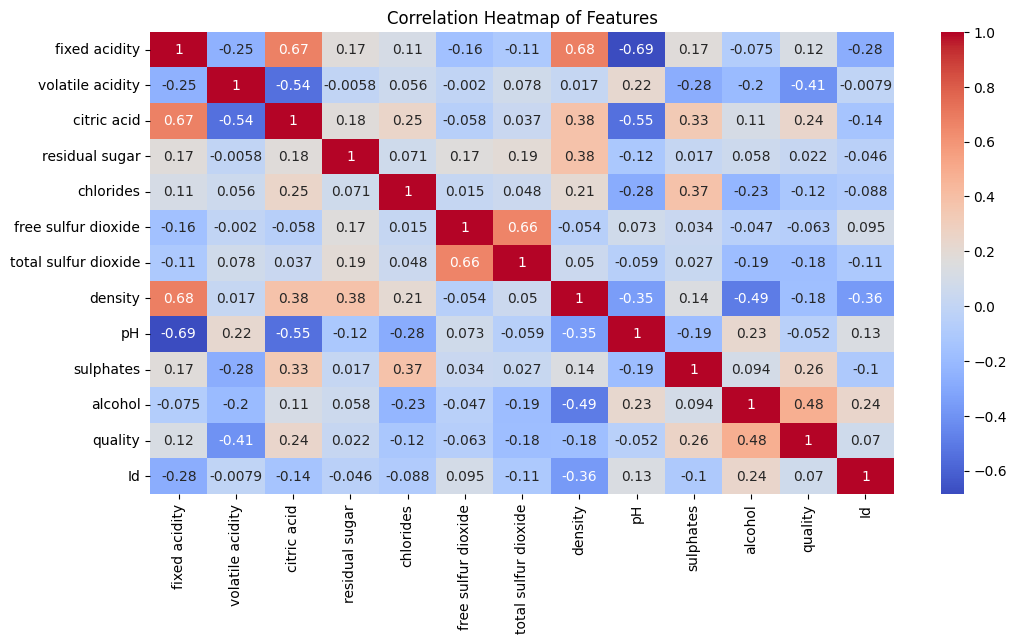

In [17]:
# 📊 Visualizing Chemical Qualities
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# 2.Classifier Models

## 1. Random Forest Classifier

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("🔍 Random Forest Classifier Report:")
print(classification_report(y_test, rf_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, rf_pred))

🔍 Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

Accuracy: 0.6899563318777293


## 2. Stochastic Gradient Descent Classifier (SGDClassifier)

In [22]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)

print("\n🔍 SGD Classifier Report:")
print(classification_report(y_test, sgd_pred,zero_division=0))
print("Accuracy:", accuracy_score(y_test, sgd_pred))


🔍 SGD Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229

Accuracy: 0.5851528384279476


## 3. Support Vector Classifier (SVC)

In [23]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)

print("\n🔍 SVC Classifier Report:")
print(classification_report(y_test, svc_pred,zero_division=0))
print("Accuracy:", accuracy_score(y_test, svc_pred))


🔍 SVC Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229

Accuracy: 0.6550218340611353


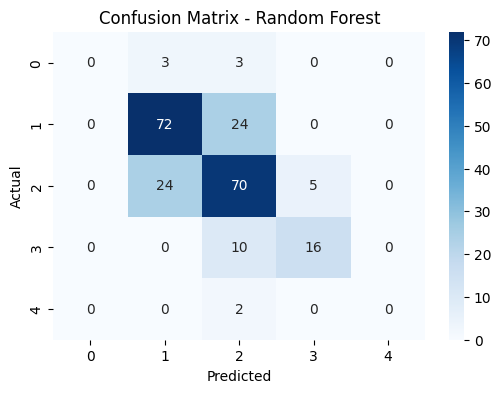

In [24]:
# 🔍 Confusion Matrix for Best Model (Random Forest)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3.Chemical Qualities

## --- Focus on Density and Acidity Features ---

In [26]:
# --- Focus on Density and Acidity Features ---
relevant_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'density', 'quality']
df_subset = df[relevant_features]

print("Subset of data with relevant chemical qualities and quality:")
print(df_subset.head())
print("\nDescriptive statistics for selected features:")
print(df_subset.describe())

Subset of data with relevant chemical qualities and quality:
   fixed acidity  volatile acidity  citric acid    pH  density  quality
0            7.4              0.70         0.00  3.51   0.9978        5
1            7.8              0.88         0.00  3.20   0.9968        5
2            7.8              0.76         0.04  3.26   0.9970        5
3           11.2              0.28         0.56  3.16   0.9980        6
4            7.4              0.70         0.00  3.51   0.9978        5

Descriptive statistics for selected features:
       fixed acidity  volatile acidity  citric acid           pH      density  \
count    1143.000000       1143.000000  1143.000000  1143.000000  1143.000000   
mean        8.311111          0.531339     0.268364     3.311015     0.996730   
std         1.747595          0.179633     0.196686     0.156664     0.001925   
min         4.600000          0.120000     0.000000     2.740000     0.990070   
25%         7.100000          0.392500     0.090000    

## --- Visualizing the relationship between Density/Acidity and Wine Quality ---


--- Data Visualizations for Density and Acidity vs. Quality ---


Text(0, 0.5, 'Fixed Acidity')

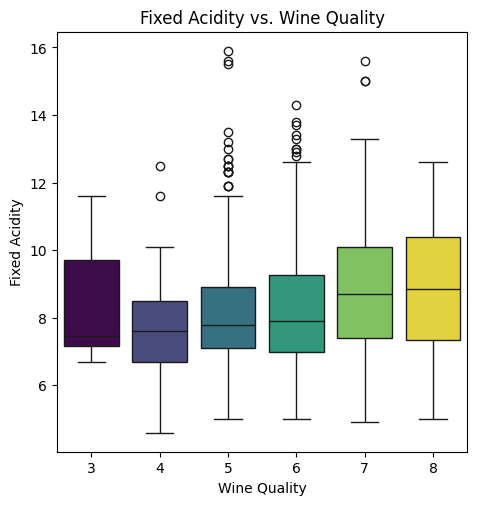

In [29]:
print("\n--- Data Visualizations for Density and Acidity vs. Quality ---")

# Box plots for acidity and density vs. quality
plt.figure(figsize=(18, 12))

# Fixed Acidity vs. Quality
plt.subplot(2, 3, 1)
sns.boxplot(x='quality', y='fixed acidity', hue='quality', data=df_subset, palette='viridis', legend=False)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')


# 4.Data Visualization

Text(0, 0.5, 'Frequency')

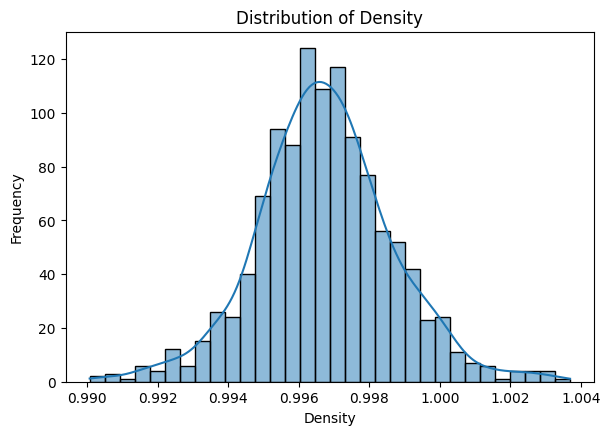

In [38]:
# Histograms of key chemical qualities
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['density'], kde=True)
plt.title('Distribution of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

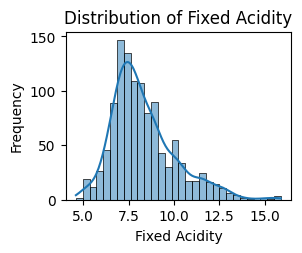

In [40]:
plt.subplot(2, 2, 2)
sns.histplot(df['fixed acidity'], kde=True)
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

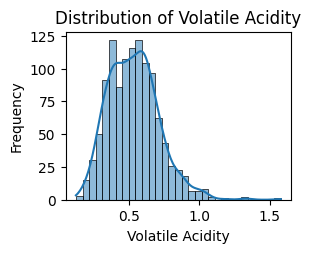

In [41]:
plt.subplot(2, 2, 3)
sns.histplot(df['volatile acidity'], kde=True)
plt.title('Distribution of Volatile Acidity')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

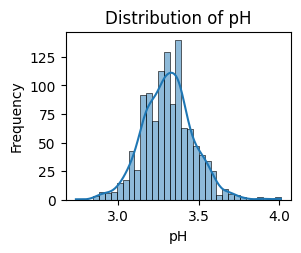

In [42]:
plt.subplot(2, 2, 4)
sns.histplot(df['pH'], kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')

In [43]:
plt.tight_layout()
plt.savefig('chemical_qualities_histograms.png')
plt.close()

Text(0, 0.5, 'Density')

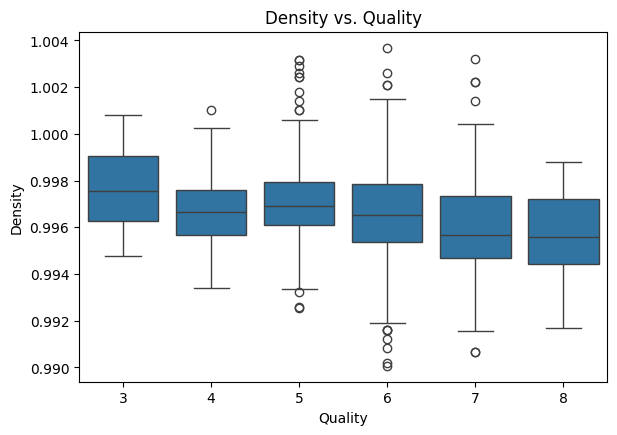

In [44]:
# Box plots to show relationship between chemical qualities and wine quality
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='quality', y='density', data=df)
plt.title('Density vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Density')

Text(0, 0.5, 'Fixed Acidity')

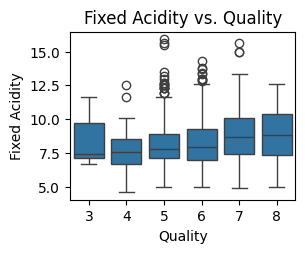

In [45]:
plt.subplot(2, 2, 2)
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Fixed Acidity vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

Text(0, 0.5, 'Volatile Acidity')

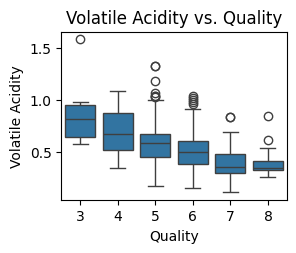

In [46]:
plt.subplot(2, 2, 3)
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity vs. Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

Text(0, 0.5, 'pH')

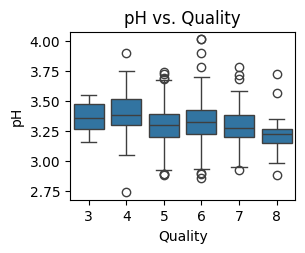

In [47]:
plt.subplot(2, 2, 4)
sns.boxplot(x='quality', y='pH', data=df)
plt.title('pH vs. Quality')
plt.xlabel('Quality')
plt.ylabel('pH')

In [48]:
plt.tight_layout()
plt.savefig('chemical_qualities_vs_quality_boxplots.png')
plt.close()

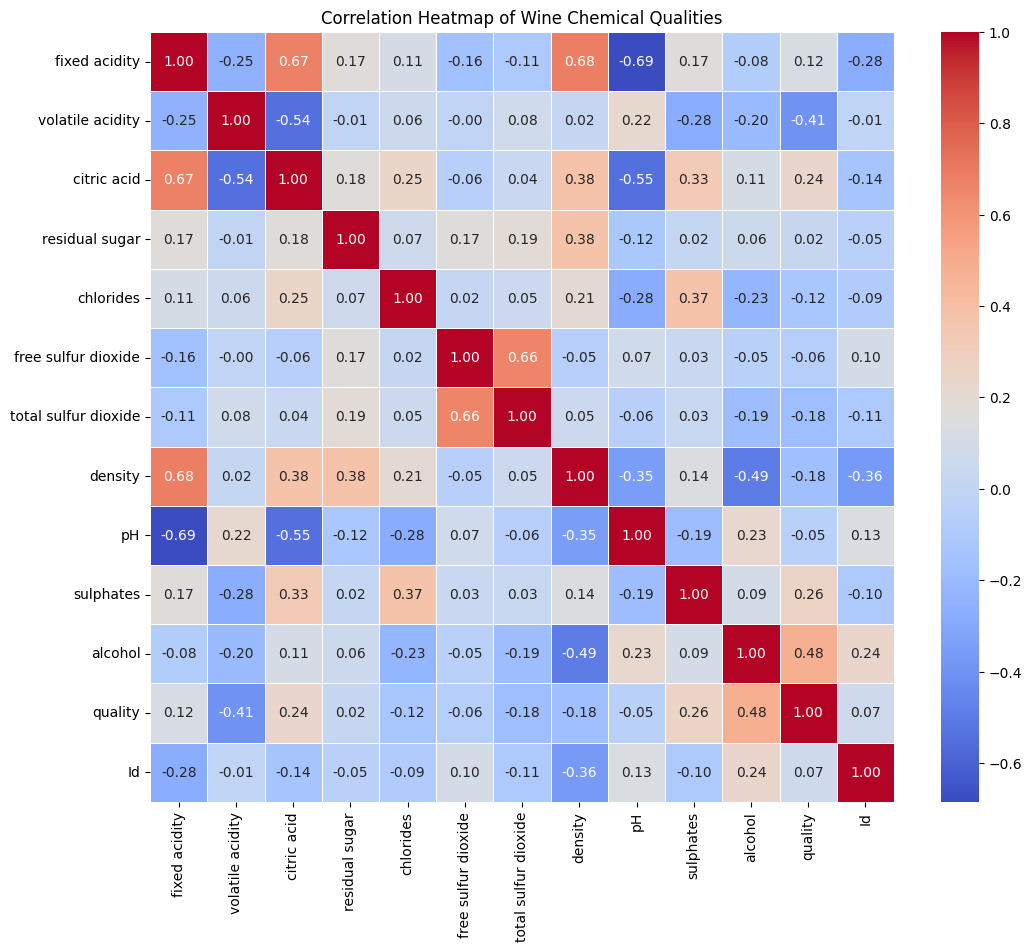

In [50]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Wine Chemical Qualities')
plt.savefig('correlation_heatmap.png')
